In [12]:
from datasets import load_dataset
import pandas as pd
from langchain.embeddings import HuggingFaceEmbeddings
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load dataset

In [2]:
dataset = load_dataset("deepset/germanquad", split="train")

df = pd.DataFrame(dataset)

df

,id,context,question,answers
0,51870,Recht_der_Vereinigten_Staaten\n\n=== Amerikani...,Von welchem Gesetzt stammt das Amerikanische ab?,"{'text': ['britischen Common Laws'], 'answer_s..."
1,51871,Recht_der_Vereinigten_Staaten\n\n=== Amerikani...,Warum unterscheidet sich das amerikanische Rec...,{'text': ['Dies rührt größtenteils von dem lan...
2,46411,Anthropologie\n\n=== Theologische Anthropologi...,Wie viele ethnische Gruppen und indigenen Völk...,"{'text': ['1300'], 'answer_start': [424]}"
3,57714,Sexuelle_Orientierung\n\n=== Ursachen für die ...,Woher kommt die Sexuelle Orientierung von Mens...,{'text': ['Es gibt wohl nicht den einen Faktor...
4,52769,Guam\n\n=== Nach dem Zweiten Weltkrieg ===\nSe...,Seit wann gehört Guam zu dem Gebiet der Verein...,"{'text': ['1949 '], 'answer_start': [131]}"
...,...,...,...,...
11513,70322,Eritrea\n\n=== Im 20. Jahrhundert ===\nFlagge ...,Welchem Staat wurde Eritrea nach dem Zweiten W...,"{'text': ['dem Kaiserreich Abessinien'], 'answ..."
11514,70323,Eritrea\n\n=== Im 20. Jahrhundert ===\nFlagge ...,In welchem Jahr annektierte Haile Selassie Eri...,"{'text': ['1961'], 'answer_start': [852]}"
11515,70324,Eritrea\n\n=== Im 20. Jahrhundert ===\nFlagge ...,Wie lange dauerte der Unabhängigkeitskampf in ...,"{'text': ['dreißig Jahren'], 'answer_start': [..."
11516,70325,Eritrea\n\n=== Im 20. Jahrhundert ===\nFlagge ...,Wann endete der Kampf um die Unabhängigkeit Er...,"{'text': ['1991'], 'answer_start': [1141]}"


# Remove additional information

In [3]:
pattern = r'^.*?\n+\s*?={1,}.*?={1,}\s*?\n+' #pattern to search for

filtered_df = df[df.context.str.contains(pattern)].copy() #only use observations containing this pattern

display(filtered_df.context[0])
filtered_df["context"] = filtered_df.context.str.replace(pattern, '', regex=True).str.replace("\n", " ") #remove those patterns
display(filtered_df.context[0])

"Recht_der_Vereinigten_Staaten\n\n=== Amerikanisches Common Law ===\nObwohl die Vereinigten Staaten wie auch viele Staaten des Commonwealth Erben des britischen Common Laws sind, setzt sich das amerikanische Recht bedeutend davon ab. Dies rührt größtenteils von dem langen Zeitraum her, in dem sich das amerikanische Recht unabhängig vom Britischen entwickelt hat. Entsprechend schauen die Gerichte in den Vereinigten Staaten bei der Analyse von eventuell zutreffenden britischen Rechtsprinzipien im Common Law gewöhnlich nur bis ins frühe 19. Jahrhundert.\nWährend es in den Commonwealth-Staaten üblich ist, dass Gerichte sich Entscheidungen und Prinzipien aus anderen Commonwealth-Staaten importieren, ist das in der amerikanischen Rechtsprechung selten. Ausnahmen bestehen hier nur, wenn sich überhaupt keine relevanten amerikanischen Fälle finden lassen, die Fakten nahezu identisch sind und die Begründung außerordentlich überzeugend ist. Frühe amerikanische Entscheidungen zitierten oft britisc

"Obwohl die Vereinigten Staaten wie auch viele Staaten des Commonwealth Erben des britischen Common Laws sind, setzt sich das amerikanische Recht bedeutend davon ab. Dies rührt größtenteils von dem langen Zeitraum her, in dem sich das amerikanische Recht unabhängig vom Britischen entwickelt hat. Entsprechend schauen die Gerichte in den Vereinigten Staaten bei der Analyse von eventuell zutreffenden britischen Rechtsprinzipien im Common Law gewöhnlich nur bis ins frühe 19. Jahrhundert. Während es in den Commonwealth-Staaten üblich ist, dass Gerichte sich Entscheidungen und Prinzipien aus anderen Commonwealth-Staaten importieren, ist das in der amerikanischen Rechtsprechung selten. Ausnahmen bestehen hier nur, wenn sich überhaupt keine relevanten amerikanischen Fälle finden lassen, die Fakten nahezu identisch sind und die Begründung außerordentlich überzeugend ist. Frühe amerikanische Entscheidungen zitierten oft britische Fälle, solche Zitate verschwanden aber während des 19. Jahrhundert

# how many answers in observations

In [4]:
filtered_df.answers.apply(lambda x: len(x["text"])).unique() 

array([1], dtype=int64)

# set answer as field

In [5]:
filtered_df["answers"] = filtered_df.answers.apply(lambda x: x["text"][0])

In [6]:
filtered_df

,id,context,question,answers
0,51870,Obwohl die Vereinigten Staaten wie auch viele ...,Von welchem Gesetzt stammt das Amerikanische ab?,britischen Common Laws
1,51871,Obwohl die Vereinigten Staaten wie auch viele ...,Warum unterscheidet sich das amerikanische Rec...,Dies rührt größtenteils von dem langen Zeitrau...
2,46411,Die theologische Anthropologie als Teilbereich...,Wie viele ethnische Gruppen und indigenen Völk...,1300
3,57714,Bis jetzt sind noch keine endgültigen und gena...,Woher kommt die Sexuelle Orientierung von Mens...,"Es gibt wohl nicht den einen Faktor, der die s..."
4,52769,Seit 1946 steht das Territorium auf der UN-Lis...,Seit wann gehört Guam zu dem Gebiet der Verein...,1949
...,...,...,...,...
11513,70322,Flagge Eritreas als autonome Region des Kaiser...,Welchem Staat wurde Eritrea nach dem Zweiten W...,dem Kaiserreich Abessinien
11514,70323,Flagge Eritreas als autonome Region des Kaiser...,In welchem Jahr annektierte Haile Selassie Eri...,1961
11515,70324,Flagge Eritreas als autonome Region des Kaiser...,Wie lange dauerte der Unabhängigkeitskampf in ...,dreißig Jahren
11516,70325,Flagge Eritreas als autonome Region des Kaiser...,Wann endete der Kampf um die Unabhängigkeit Er...,1991


# drop id

In [7]:
filtered_df = filtered_df.drop(columns="id")

# Switching context and question

In [8]:
print("number of rows:", filtered_df.size)
print("number of unique texts: ", filtered_df.context.unique().size)

number of rows: 31704
number of unique texts:  2361


In [9]:
filtered_df.context.unique()

array(["Obwohl die Vereinigten Staaten wie auch viele Staaten des Commonwealth Erben des britischen Common Laws sind, setzt sich das amerikanische Recht bedeutend davon ab. Dies rührt größtenteils von dem langen Zeitraum her, in dem sich das amerikanische Recht unabhängig vom Britischen entwickelt hat. Entsprechend schauen die Gerichte in den Vereinigten Staaten bei der Analyse von eventuell zutreffenden britischen Rechtsprinzipien im Common Law gewöhnlich nur bis ins frühe 19. Jahrhundert. Während es in den Commonwealth-Staaten üblich ist, dass Gerichte sich Entscheidungen und Prinzipien aus anderen Commonwealth-Staaten importieren, ist das in der amerikanischen Rechtsprechung selten. Ausnahmen bestehen hier nur, wenn sich überhaupt keine relevanten amerikanischen Fälle finden lassen, die Fakten nahezu identisch sind und die Begründung außerordentlich überzeugend ist. Frühe amerikanische Entscheidungen zitierten oft britische Fälle, solche Zitate verschwanden aber während des 19. Jahr

Each context block has multiple questions.

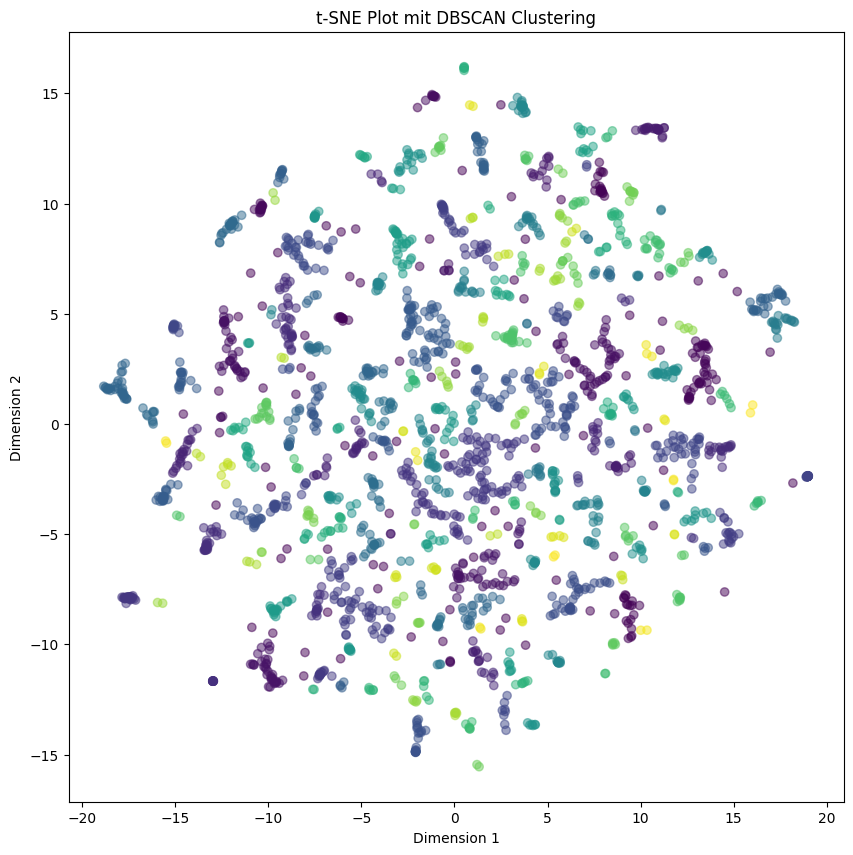

In [10]:
unique_text = filtered_df.context.unique()

def create_tsne_plot(texts, pca_dim=50, perplexity=30, learning_rate=200, eps=0.5, min_samples=2):

    embeddings = np.array(HuggingFaceEmbeddings(model_name="sentence-transformers/distiluse-base-multilingual-cased-v1").embed_documents(texts))

    # Cimensionality reduction
    pca = PCA(n_components=pca_dim)
    pca_result = pca.fit_transform(embeddings)
    
    # applyt-SNE
    tsne = TSNE(perplexity=perplexity, learning_rate=learning_rate, n_iter=300, random_state=42)
    tsne_result = tsne.fit_transform(pca_result)

    # apply DBSCAN to find clusters
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = dbscan.fit_predict(tsne_result)

    return pd.DataFrame({
        "Dim1": tsne_result[:, 0],
        "Dim2": tsne_result[:, 1],
        "Cluster": cluster_labels,
        "Text": texts
    })

output = create_tsne_plot(unique_text)

# plot
plt.figure(figsize=(10, 10))
plt.scatter(output.Dim1, output.Dim2, c=output.Cluster, cmap='viridis', alpha=0.5)
plt.title('t-SNE Plot mit DBSCAN Clustering')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

T-SNE plot of context embeddings.<br>
There are clusters where embeddings are close.<br>
Investigate if texts in those clusters are the same.

In [11]:
for cluster_id, df in list(output.groupby("Cluster"))[1:5]:
    print(cluster_id)
    for text in df.Text:
        print(text)
    print("\n")

0
Obwohl die Vereinigten Staaten wie auch viele Staaten des Commonwealth Erben des britischen Common Laws sind, setzt sich das amerikanische Recht bedeutend davon ab. Dies rührt größtenteils von dem langen Zeitraum her, in dem sich das amerikanische Recht unabhängig vom Britischen entwickelt hat. Entsprechend schauen die Gerichte in den Vereinigten Staaten bei der Analyse von eventuell zutreffenden britischen Rechtsprinzipien im Common Law gewöhnlich nur bis ins frühe 19. Jahrhundert. Während es in den Commonwealth-Staaten üblich ist, dass Gerichte sich Entscheidungen und Prinzipien aus anderen Commonwealth-Staaten importieren, ist das in der amerikanischen Rechtsprechung selten. Ausnahmen bestehen hier nur, wenn sich überhaupt keine relevanten amerikanischen Fälle finden lassen, die Fakten nahezu identisch sind und die Begründung außerordentlich überzeugend ist. Frühe amerikanische Entscheidungen zitierten oft britische Fälle, solche Zitate verschwanden aber während des 19. Jahrhunder

Texts are not the same -> suffling should be okay

In [12]:
filtered_df

,context,question,answers
0,Obwohl die Vereinigten Staaten wie auch viele ...,Von welchem Gesetzt stammt das Amerikanische ab?,britischen Common Laws
1,Obwohl die Vereinigten Staaten wie auch viele ...,Warum unterscheidet sich das amerikanische Rec...,Dies rührt größtenteils von dem langen Zeitrau...
2,Die theologische Anthropologie als Teilbereich...,Wie viele ethnische Gruppen und indigenen Völk...,1300
3,Bis jetzt sind noch keine endgültigen und gena...,Woher kommt die Sexuelle Orientierung von Mens...,"Es gibt wohl nicht den einen Faktor, der die s..."
4,Seit 1946 steht das Territorium auf der UN-Lis...,Seit wann gehört Guam zu dem Gebiet der Verein...,1949
...,...,...,...
11513,Flagge Eritreas als autonome Region des Kaiser...,Welchem Staat wurde Eritrea nach dem Zweiten W...,dem Kaiserreich Abessinien
11514,Flagge Eritreas als autonome Region des Kaiser...,In welchem Jahr annektierte Haile Selassie Eri...,1961
11515,Flagge Eritreas als autonome Region des Kaiser...,Wie lange dauerte der Unabhängigkeitskampf in ...,dreißig Jahren
11516,Flagge Eritreas als autonome Region des Kaiser...,Wann endete der Kampf um die Unabhängigkeit Er...,1991


In [14]:
def swap_context(df:pd.DataFrame):
    def shuffle(input):
        copy = input.copy()

        while True:
            np.random.shuffle(copy)
            if np.all(copy != input):
                break

        return copy
        
    grouped = df.groupby("context")

    keys_from = list(grouped.groups.keys())
    keys_to = shuffle(keys_from)

    mapper = {key: value for key, value in zip(keys_from, keys_to)}

    def swap(key, df):
        df = df.copy()
        df["context"] = [mapper[key]]*len(df)
        df["answers"] = ["Leider liegen mir dazu keine Informationen vor"]*len(df)

        return df

    return pd.concat([swap(key, df) for (key, df) in grouped], ignore_index=True)

display(filtered_df)
display(swap_context(filtered_df))

,context,question,answers
0,Obwohl die Vereinigten Staaten wie auch viele ...,Von welchem Gesetzt stammt das Amerikanische ab?,britischen Common Laws
1,Obwohl die Vereinigten Staaten wie auch viele ...,Warum unterscheidet sich das amerikanische Rec...,Dies rührt größtenteils von dem langen Zeitrau...
2,Die theologische Anthropologie als Teilbereich...,Wie viele ethnische Gruppen und indigenen Völk...,1300
3,Bis jetzt sind noch keine endgültigen und gena...,Woher kommt die Sexuelle Orientierung von Mens...,"Es gibt wohl nicht den einen Faktor, der die s..."
4,Seit 1946 steht das Territorium auf der UN-Lis...,Seit wann gehört Guam zu dem Gebiet der Verein...,1949
...,...,...,...
11513,Flagge Eritreas als autonome Region des Kaiser...,Welchem Staat wurde Eritrea nach dem Zweiten W...,dem Kaiserreich Abessinien
11514,Flagge Eritreas als autonome Region des Kaiser...,In welchem Jahr annektierte Haile Selassie Eri...,1961
11515,Flagge Eritreas als autonome Region des Kaiser...,Wie lange dauerte der Unabhängigkeitskampf in ...,dreißig Jahren
11516,Flagge Eritreas als autonome Region des Kaiser...,Wann endete der Kampf um die Unabhängigkeit Er...,1991


,context,question,answers
0,Durch den ungewöhnlich hohen durchschnittliche...,Wozu werden die ersten 32-ASCII Zeichencodes v...,Leider liegen mir dazu keine Informationen vor
1,Durch den ungewöhnlich hohen durchschnittliche...,Welchen Code im ASCII-Zeichensatz hat das Leer...,Leider liegen mir dazu keine Informationen vor
2,Durch den ungewöhnlich hohen durchschnittliche...,Welche Buchstaben kann man in der ASCII-Zeiche...,Leider liegen mir dazu keine Informationen vor
3,Durch den ungewöhnlich hohen durchschnittliche...,Warum gibt es keine Anführungszeichen in der A...,Leider liegen mir dazu keine Informationen vor
4,Durch den ungewöhnlich hohen durchschnittliche...,Wie hat man den Code 7Fhex aus dem ASCII-Zeich...,Leider liegen mir dazu keine Informationen vor
...,...,...,...
10563,Bedientableau eines Aufzugs mit Braille-Schrif...,Wer in Griechenland lernt Altgriechisch in der...,Leider liegen mir dazu keine Informationen vor
10564,Bedientableau eines Aufzugs mit Braille-Schrif...,Welchen Konflikt hat Griechenland mit Mazedonien?,Leider liegen mir dazu keine Informationen vor
10565,Bedientableau eines Aufzugs mit Braille-Schrif...,Als was sehen sich einige Griechen immer noch?,Leider liegen mir dazu keine Informationen vor
10566,Bedientableau eines Aufzugs mit Braille-Schrif...,Welche Erwartung gibt es im griechischen Volk...,Leider liegen mir dazu keine Informationen vor


# Abstracted Version

In [23]:
from datasets import load_from_disk

dataset = load_from_disk("../data/processed/ft_dataset_abstractive.hf")

df = pd.DataFrame(dataset)

In [24]:
df

,context,question,answers,can_be_answered,__index_level_0__,extractive_answer
0,"[{""QUELLE"": ""Wikipedia"", ""INHALT"": ""Während ei...",Wer ist der Gott der Heilkunst in der griechis...,Der Gott der Heilkunst in der griechischen Ant...,True,271,Asklepios
1,"[{""QUELLE"": ""Website: www.elektronik-kompendiu...",Bei welchen Kondensatoren tritt Selbstentladun...,Selbstentladung tritt bei allen Kondensatoren ...,True,146,Ein auf eine Gleichspannung aufgeladener real...
2,"[{""QUELLE"": ""Website: https://www.geschichte-l...",Wer war die zweite Verlobte von Johann Ohneland?,Die zweite Verlobte von Johann Ohneland war Is...,True,305,Isabel von Gloucester
3,"[{""QUELLE"": ""Website der Stadt St. John's"", ""I...",Wo ist findet man in New York das meiste Theat...,Leider kann ich Ihnen keine genaue Antwort auf...,False,654,Leider liegen mir dazu keine Informationen vor
4,"[{""QUELLE"": ""Website: www.china-guide.de"", ""IN...",Welche Auswirkung für die Gesellschaft hatte d...,Die Etablierung eines einheitlichen Schriftsys...,True,532,eine relative Geschlossenheit des chinesischen...
5,"[{""QUELLE"": ""Reynolds Tobacco Company haben ih...",Welche Tabakkonzerne haben ihren Sitz in North...,Die Tabakkonzerne R.J. Reynolds Tobacco Compan...,True,511,beispielsweise R.J. Reynolds Tobacco Company u...
6,"[{""QUELLE"": ""Quelle: CIA World Factbook"", ""INH...",Welche Mineralien werden in Armenien gewonnen?,In Armenien werden verschiedene Mineralien abg...,True,21,"Molybdän, Diamanten, Kupfer, sowie Gold. In kl..."
7,"[{""QUELLE"": ""Reporter ohne Grenzen (2017). Ran...","Wie viele täglich erscheinende, landesweite Ze...",Es gibt in Nigeria etwa 25 überregionale Tages...,True,412,etwa 25
8,"[{""QUELLE"": ""Website: www.lungeninformationsdi...",Zu was führt die Ausschüttung von allergieausl...,Die Ausschüttung von allergieauslösenden Boten...,True,301,Atemwegsverengung
9,"[{""QUELLE"": ""Website: FC Barcelona (www.fcbarc...",Wann gewann die FC Barcelona U19 zum zweiten m...,Die FC Barcelona U19 gewann zum zweiten Mal di...,True,342,2017/18


In [25]:
# write df to csv
df.to_csv("../data/processed/ft_dataset_abstractive.csv", index=False)

In [26]:
# iterrrows and print extractive_answer and answers
for index, row in df.iterrows():
    print(row["question"])
    print(row["extractive_answer"])
    print(row["answers"])
    print("\n")

Wer ist der Gott der Heilkunst in der griechischen Antike?
Asklepios
Der Gott der Heilkunst in der griechischen Antike ist Asklepios. (Quelle: Wikipedia)


Bei welchen Kondensatoren tritt Selbstentladung auf?
Ein auf eine Gleichspannung  aufgeladener realer Kondensator
Selbstentladung tritt bei allen Kondensatoren auf, die einen endlichen Isolationswiderstand des Dielektrikums haben. Dieser Effekt führt dazu, dass sich ein aufgeladener Kondensator mit der Zeit von selbst entlädt. Die Selbstentladezeitkonstante ist ein Maß für die Isolation des Dielektrikums und gibt an, wie schnell die Kondensatorspannung absinkt. Keramikkondensatoren der Klasse 1 müssen einen Isolationswiderstand von mindestens 10 GΩ oder eine Selbstentladezeitkonstante von mindestens 100 s haben. Kunststoff-Folienkondensatoren haben typischerweise einen Isolationswiderstand zwischen 6 und 12 GΩ, was einer Selbstentladezeitkonstante von 2000 bis 4000 s entspricht. Bei Elektrolytkondensatoren wird der Isolationswiderst